<p>
<img src="http://www.cerm.unifi.it/chianti/images/logo%20unifi_positivo.jpg" 
        alt="UniFI logo" style="float: left; width: 20%; height: 20%;">
<div align="right">
Massimo Nocentini<br>
<small>
<br>February 28, 2018: splitting from "big" notebook
</small>
</div>
</p>
<br>
<br>
<div align="center">
<b>Abstract</b><br>
Theory of matrix functions, matricial characterization of Hermite interpolating polynomials.
</div>

In [1]:
from sympy import *
from sympy.abc import n, i, N, x, lamda, phi, z, j, r, k, a, t, alpha

init_printing()

In [2]:
%run ../../src/matrix_functions.py
%run ../../src/sequences.py

In [24]:
d = IndexedBase('d')
g = Function('g')

---

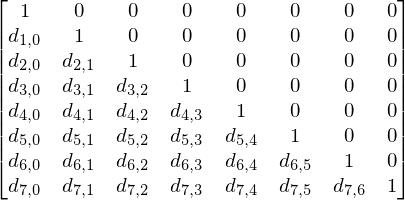

In [4]:
m=8
R = Matrix(m, m, riordan_matrix_by_recurrence(m, lambda n, k: {(n, k):1 if n == k else d[n, k]}))
R

In [5]:
data, eigenvals, multiplicities = eigendata = eigen_data(R)
eigendata

In [6]:
Phi_poly = Phi_poly_ctor(deg=m-1)
Phi_poly

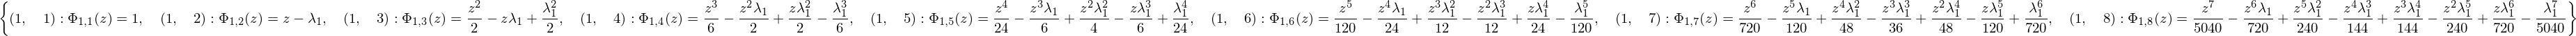

In [7]:
Phi_polynomials = component_polynomials(Phi_poly, eigendata)
Phi_polynomials

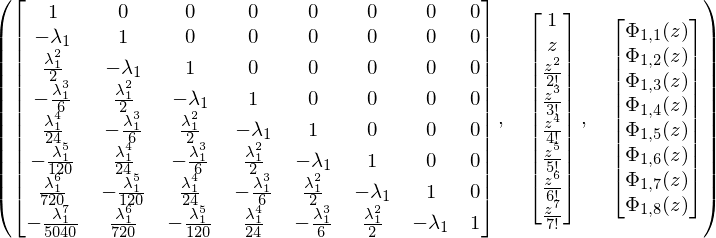

In [8]:
res_expt = M_expt, z_expt, Phi_expt =(
    Matrix(m, m, lambda n,k: (-lamda_indexed[1])**(n-k)/(factorial(n-k)) if n-k >= 0 else 0),
    Matrix([z**i/factorial(i, evaluate=i<2) for i in range(m)]),
    Matrix([Function(r'\Phi_{{ {}, {} }}'.format(1, j))(z) for j in range(1, m+1)]))

res_expt

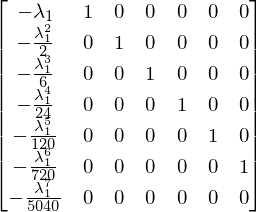

In [9]:
production_matrix(M_expt)

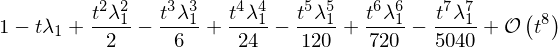

In [10]:
exp(-lamda_indexed[1]*t).series(t, n=m)

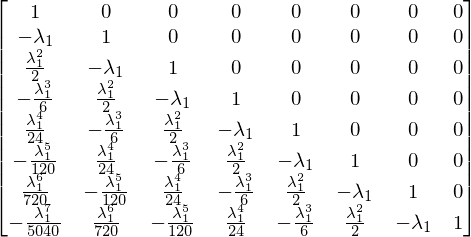

In [11]:
g, f = Function('g'), Function('f')
ERA = Matrix(m, m, riordan_matrix_by_convolution(m, 
                                                 d=Eq(g(t), exp(-lamda_indexed[1]*t)), 
                                                 h=Eq(f(t), t)))
ERA

In [12]:
assert M_expt == ERA

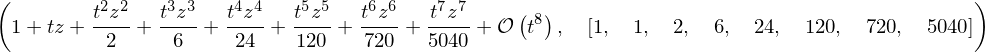

In [13]:
exp(z*t).series(t, n=m), [factorial(i) for i in range(m)]

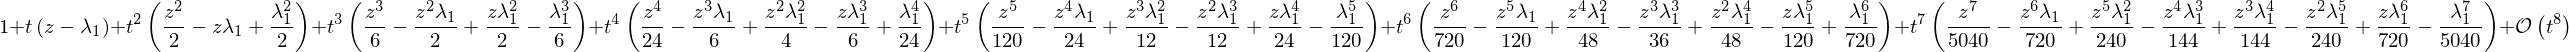

In [14]:
exp(t*(z-lamda_indexed[1])).series(t, n=m)

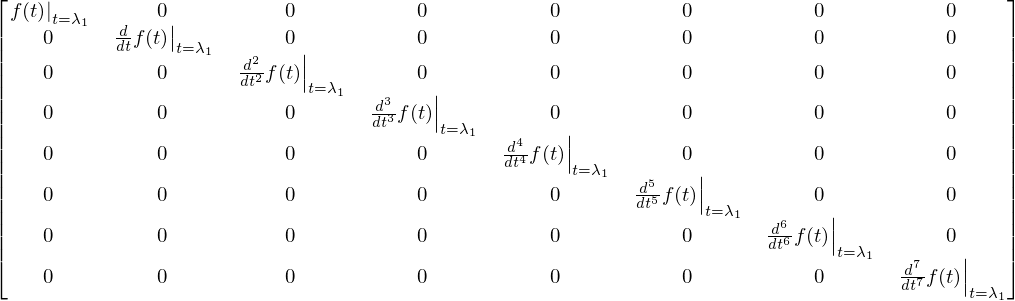

In [15]:
partials = Matrix(m, m, lambda n, k: Subs(f(t).diff(t, n), [t], [lamda_indexed[1]]) if n==k else 0)
partials

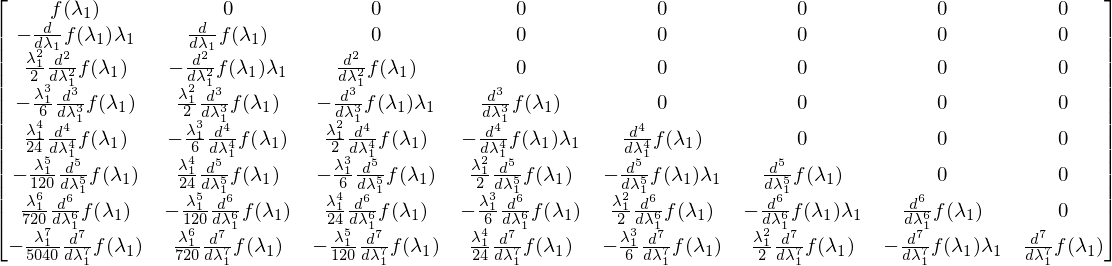

In [16]:
DE = (partials * M_expt).applyfunc(lambda i: i.doit())
DE

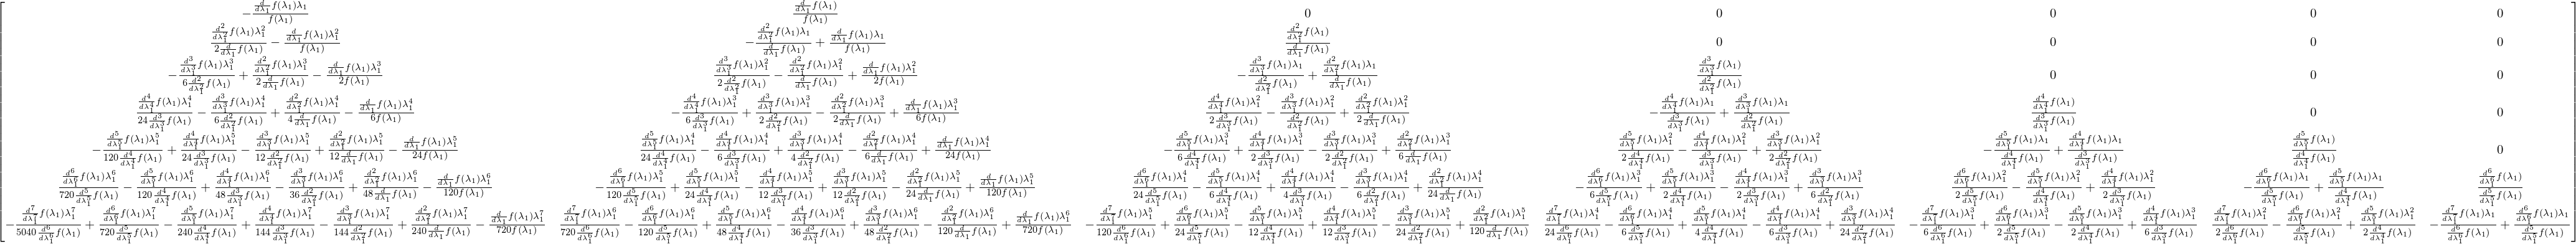

In [17]:
production_matrix(DE).applyfunc(simplify)

In [18]:
f_t = pow(t, n)
i = 1
(f_t.diff(*([t]*(i+1)), evaluate=False)/f_t.diff(*([t]*i), evaluate=False)).doit().subs({t:1}).simplify()

## $f(z)=\frac{1}{z}$

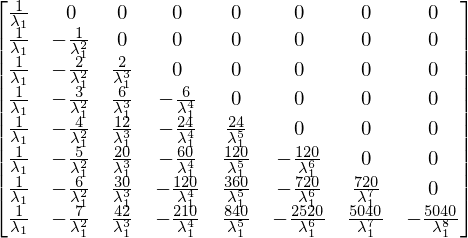

In [19]:
DE_inv = DE.subs({f:Lambda(t, 1/t)}).applyfunc(lambda i: i.doit())
DE_inv

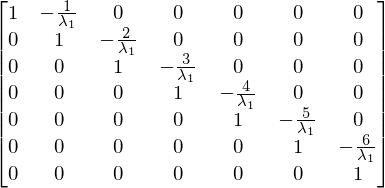

In [21]:
production_matrix(DE_inv)

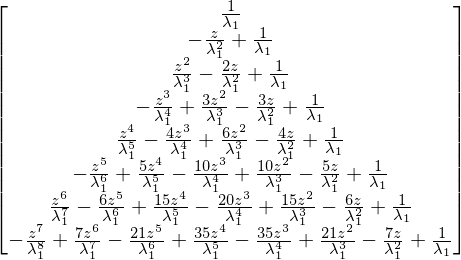

In [22]:
DEz = (DE_inv* z_expt).applyfunc(lambda i: i.doit())
DEz

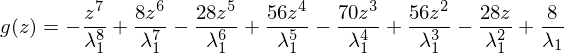

In [27]:
g_v = ones(1, m) * DEz
Eq(g(z), g_v[0,0], evaluate=False)

## $f(z)=z^{r}$

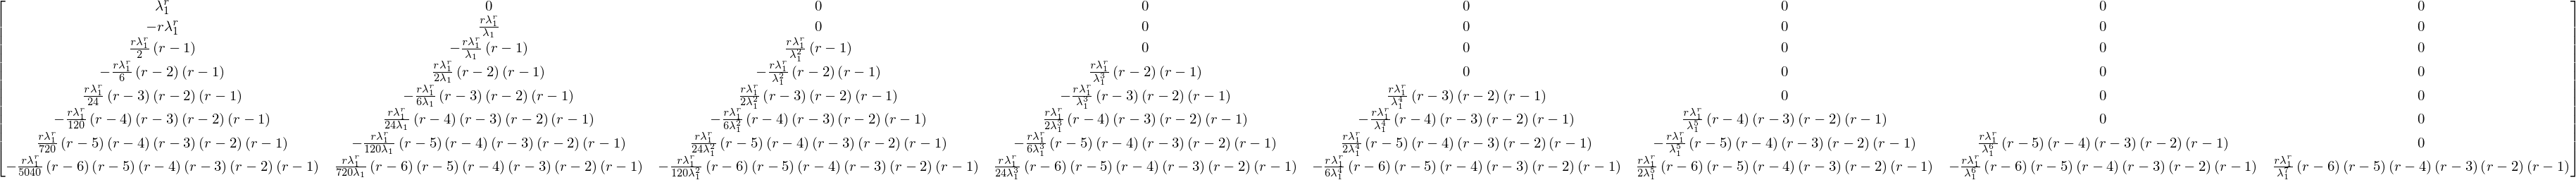

In [33]:
DE_pow = DE.subs({f:Lambda(t, t**r)}).applyfunc(lambda i: i.doit().factor())
DE_pow

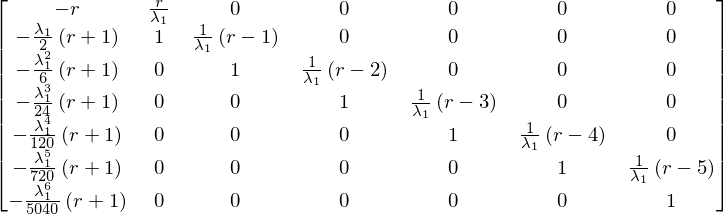

In [34]:
production_matrix(DE_pow)

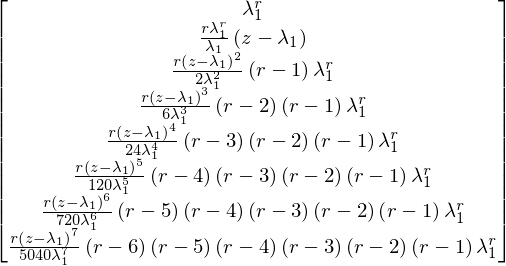

In [38]:
DEz = (DE_pow* z_expt).applyfunc(lambda i: i.doit().factor())
DEz

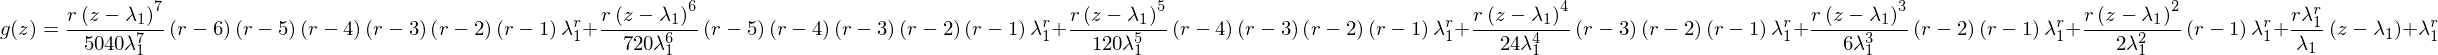

In [43]:
g_v = ones(1, m) * DEz
Eq(g(z), g_v[0,0].collect(z), evaluate=False)